In [67]:
import pandas as pd
import geopandas as gpd
import numpy as np
import shapely

import plotly.express as px
import plotly.graph_objects as go

mapbox_access_token = open('token.mapbox_token').read()
px.set_mapbox_access_token(mapbox_access_token)

In [41]:
df = pd.read_csv('Anabasis.csv', keep_default_na=False)
df['geometry'] = gpd.points_from_xy(df['longitude'], df['latitude'])

df.head()

,latitude,longitude,start_day,end_day,event_type,event_name,event_description,bibliography,troop_count,geometry
0,37.941111,27.341944,0,0,city,Ephesus,Xenophon departs from Ephesus to join the expe...,,,POINT (27.34194 37.94111)
1,38.488333,28.040278,7,30,city,Sardes,Xenophon arrives in Sardes where Cyrus is gath...,,,POINT (28.04028 38.48833)
2,36.494167,36.024167,150,157,city,Myriandos,"Cyrus' forces arrive at Myriandos, at the bord...",1.4.6,,POINT (36.02417 36.49417)
3,33.321579,44.074388,213,213,battle,Cunaxa,The Hellenes fight alongside Cyrus and emerge ...,1.7.20; 1.10.1-1.10.18,,POINT (44.07439 33.32158)


In [42]:
gdf = gpd.GeoDataFrame(df)
gdf.set_crs(epsg=4326, allow_override=True, inplace=True)

gdf.head()

,latitude,longitude,start_day,end_day,event_type,event_name,event_description,bibliography,troop_count,geometry
0,37.941111,27.341944,0,0,city,Ephesus,Xenophon departs from Ephesus to join the expe...,,,POINT (27.34194 37.94111)
1,38.488333,28.040278,7,30,city,Sardes,Xenophon arrives in Sardes where Cyrus is gath...,,,POINT (28.04028 38.48833)
2,36.494167,36.024167,150,157,city,Myriandos,"Cyrus' forces arrive at Myriandos, at the bord...",1.4.6,,POINT (36.02417 36.49417)
3,33.321579,44.074388,213,213,battle,Cunaxa,The Hellenes fight alongside Cyrus and emerge ...,1.7.20; 1.10.1-1.10.18,,POINT (44.07439 33.32158)


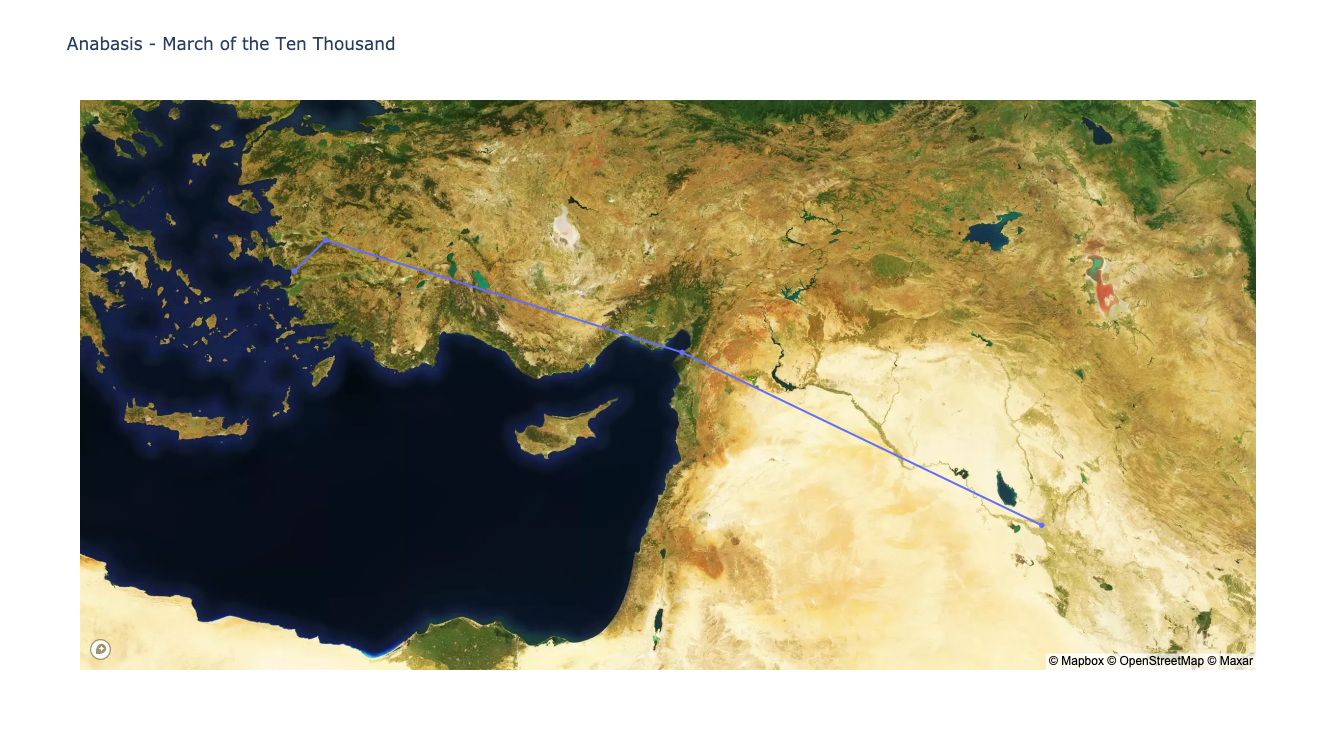

In [99]:
fig = go.Figure(go.Scattermapbox(
        lat=gdf.geometry.y,
        lon=gdf.geometry.x,
        mode='markers+lines',
        customdata=np.stack((gdf['event_name'], gdf['event_description'], gdf['bibliography']), axis=-1),
        hovertemplate =
        '<b>%{customdata[0]}</b><br><br>' +
        '%{customdata[1]}<br>'+
        'Bibliography: %{customdata[2]}'+
        '<extra></extra>'
    ))

extents_latitude =[gdf["latitude"].min(), gdf["latitude"].max()]
extents_longitude =[gdf["longitude"].min(), gdf["longitude"].max()]
max_bound = max(abs(extents_latitude[0]-extents_latitude[1]), abs(extents_longitude[0]-extents_longitude[1])) * 111
zoom = 12.5 - np.log(max_bound)

fig.update_layout(
    title='Anabasis - March of the Ten Thousand',
    autosize=False,
    width=1000,
    height=750,
    hovermode='closest',
    mapbox=dict(
        accesstoken = mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=extents_latitude[0] + (extents_latitude[1] - extents_latitude[0]) / 2,
            lon=extents_longitude[0] + (extents_longitude[1] - extents_longitude[0]) / 2
        ),
        pitch=0,
        zoom=zoom,
        style='mapbox://styles/wolololf/ckjcyusqlks2a19qts3en5dnf'
    ))

fig.show()